<a href="https://colab.research.google.com/github/raphaelobinna/ecg_generator/blob/main/ECG_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

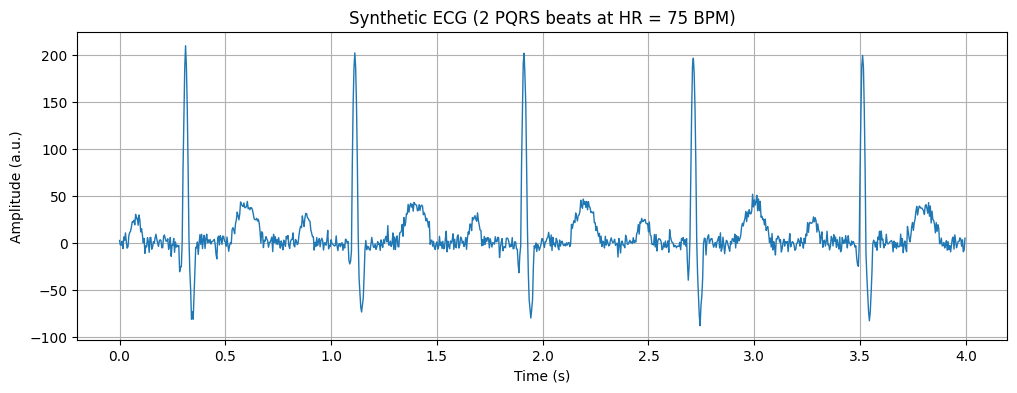

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
AMPLITUDE_SCALE = 100
SAMPLE_RATE = 250  # Hz
DURATION = 4       # seconds (should produce ~2 beats at 60 BPM)
HEART_RATE = 75    # BPM

def generate_pqrs_complex(t, heart_rate):
    period = 60.0 / heart_rate
    t_norm = (t % period) / period

    amp = 0.0

    # P wave (0.05–0.15)
    if 0.05 <= t_norm <= 0.15:
        p_time = (t_norm - 0.05) / 0.10
        amp += 0.25 * np.sin(np.pi * p_time)

    # QRS complex (0.35–0.45)
    if 0.35 <= t_norm <= 0.45:
        qrs_time = (t_norm - 0.35) / 0.10
        if qrs_time <= 0.2:  # Q wave
            amp -= 0.3 * np.sin(np.pi * qrs_time / 0.2)
        elif qrs_time <= 0.6:  # R wave
            r_time = (qrs_time - 0.2) / 0.4
            amp += 2.0 * np.sin(np.pi * r_time)
        else:  # S wave
            s_time = (qrs_time - 0.6) / 0.4
            amp -= 0.8 * np.sin(np.pi * s_time)

    # T wave (0.65–0.85)
    if 0.65 <= t_norm <= 0.85:
        t_time = (t_norm - 0.65) / 0.20
        amp += 0.4 * np.sin(np.pi * t_time)

    # Add baseline noise
    amp += np.random.randn() * 0.05


    return amp * AMPLITUDE_SCALE

# Generate ECG signal
times = np.arange(0, DURATION, 1 / SAMPLE_RATE)
ecg = [generate_pqrs_complex(t, HEART_RATE) for t in times]

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(times, ecg, linewidth=1)
plt.title(f"Synthetic ECG (2 PQRS beats at HR = {HEART_RATE} BPM)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.grid(True)
plt.show()
